<a href="https://colab.research.google.com/github/NoahStefancik-UR/CSC241_Assignments/blob/main/CSC241_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Noah Stefancik
Undergrad Student

Simulation Questions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# in ms and mV
tau = 20.0
V_rest = -65.0
V_reset = -70.0
V_thresh = -50.0
V_spike = 40.0

def constant_current(I):
    return lambda step, dt: I

def gaussian_distribution_current(I=1.3, sigma=0.1):
    #uses np.random for guassian
    return lambda step, dt: np.random.normal(loc=I, scale=sigma)

def diffEQ_Solver(dt, V0, T, current_func):
    #eulers method simulation
    num_steps = int(T / dt)
    V = V0
    mem_Potentials = []
    times = []
    spike_times = []

    for step in range(num_steps):
        t = step * dt
        I = current_func(step, dt)
        dV = -((V - V_rest) / tau) + I
        V = V + dt * dV

        if V >= V_thresh:
            mem_Potentials.append(V_spike)
            spike_times.append(t)
            V = V_reset
        elif V < V_reset:
            V = V_reset
            mem_Potentials.append(V)
        else:
            mem_Potentials.append(V)

        times.append(t)

    return np.array(times), np.array(mem_Potentials), np.array(spike_times)

def plot_sim(times, potentials, title="LIF Neuron Simulation"):
    plt.figure(figsize=(10,4))
    plt.plot(times, potentials, lw=1)
    plt.xlabel("Time (ms)")
    plt.ylabel("Membrane Potential (mV)")
    plt.title(title)
    plt.grid(True)
    plt.show()


Question 1.)

For $I(t)=0$ we call the Constant Current version of our simultion at 0V/s.

We then plot two different initial conditions of $V(0)=-70$mv and $V(0)=-60$mv.

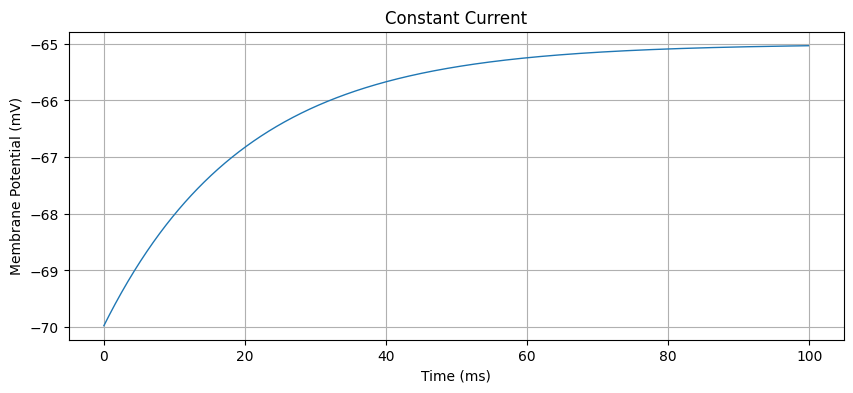

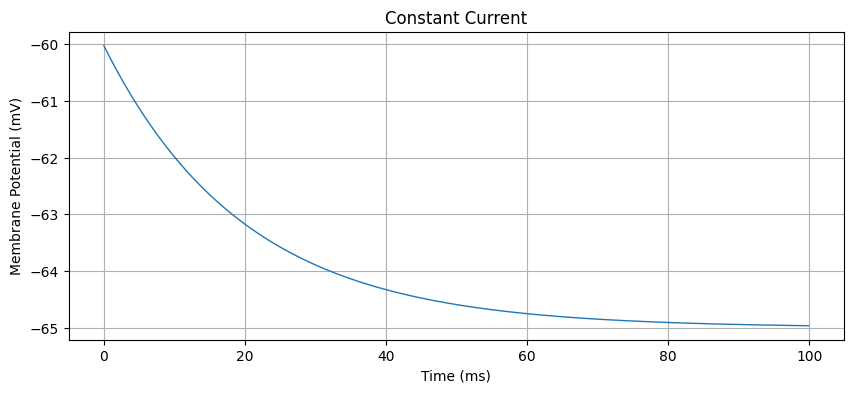

In [3]:
T = 100   # ms
dt = 0.1
V0 = -70.0

times, V, spike_times = diffEQ_Solver(dt, V0, T, constant_current(0))
plot_sim(times, V, "Constant Current")

V0 = -60.0

times, V, spike_times = diffEQ_Solver(dt, V0, T, constant_current(0))
plot_sim(times, V, "Constant Current")

Question 2.)

Analytically we can solve for this using the equation $\frac{V_\infty-V_\text{rest}}{\tau} = I$ so our minimum current to reach a given voltage $V_\infty$ is $I$. We plug into our equation our given numbers and see $\frac{-50-(-65)}{20}=0.75$ and so our minimum value of $I_0$ is 0.75V/s. Verifying with the simulation we see that this holds up with very small errors due to simulation design.

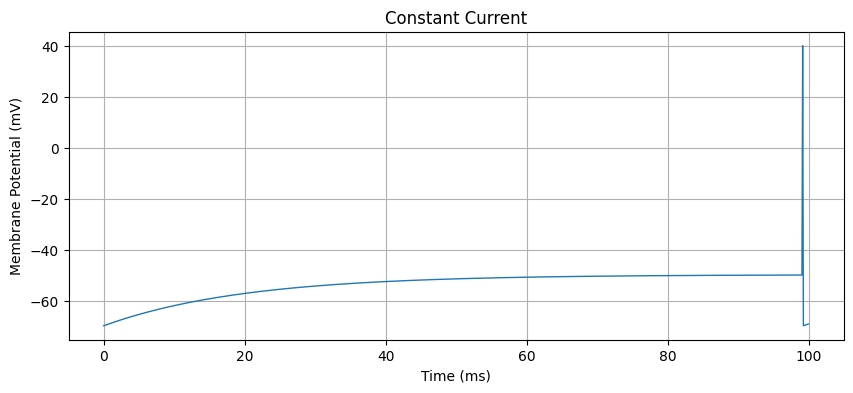

Spike Number: 1


In [4]:
T = 100   # ms
dt = 0.1
V0 = -70.0

# We use 0.757 rather than 0.75 because this is a number that will
# actually spike in our simulation due to the finitie amount of time

times, V, spike_times = diffEQ_Solver(dt, V0, T, constant_current(0.757))
plot_sim(times, V, "Constant Current")
print("Spike Number:", len(spike_times))

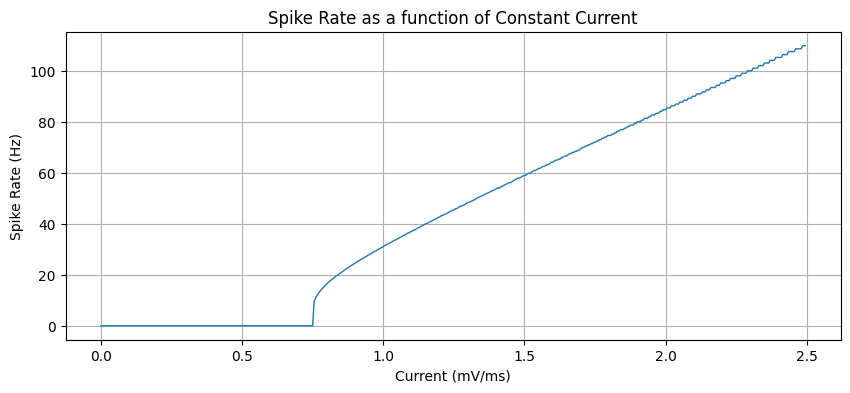

In [5]:
T = 10000   # ms
dt = 0.1
V0 = V_reset
spike_rates = []

currents = np.arange(0, 2.5, 0.005)

for I0 in currents:
    times, V, spike_times = diffEQ_Solver(dt, V0, T, constant_current(I0))
    spike_count = len(spike_times)
    rate_hz = spike_count / (T / 1000.0)  # convert to Hz
    spike_rates.append(rate_hz)

plt.figure(figsize=(10,4))
plt.plot(currents, spike_rates, lw=1)
plt.xlabel("Current (mV/ms)")
plt.ylabel("Spike Rate (Hz)")
plt.title("Spike Rate as a function of Constant Current")
plt.grid(True)
plt.show()


Question 3.)

Number of spikes: 4


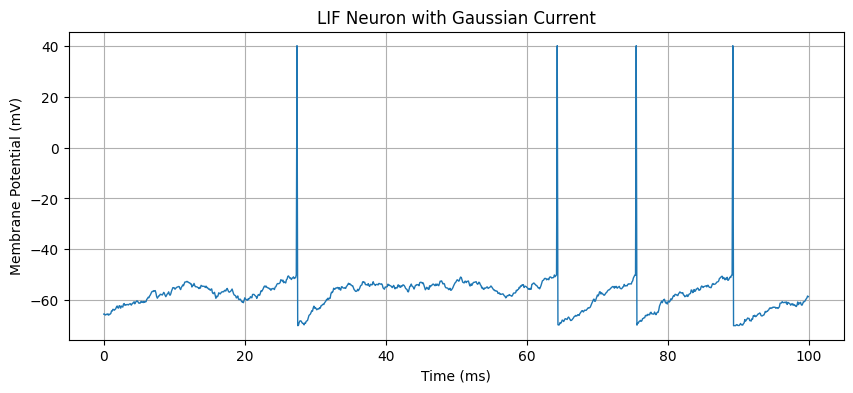

Mean ISI: 20.599999999999998
Std of ISI: 11.570940612874415


In [6]:
dt = 0.1
T = 100.0
V0 = -65.0

# Use Gaussian-distributed current
times, potentials, spike_times = diffEQ_Solver(dt, V0, T, gaussian_distribution_current(I=1.3, sigma=5))
num_spikes = len(spike_times)

print("Number of spikes:", num_spikes)
plot_sim(times, potentials, title="LIF Neuron with Gaussian Current")


isis = np.diff(spike_times)  # differences between spike times

print("Mean ISI:", np.mean(isis) if len(isis) > 0 else "No spikes")
print("Std of ISI:", np.std(isis) if len(isis) > 0 else "No spikes")


Number of spikes: 241


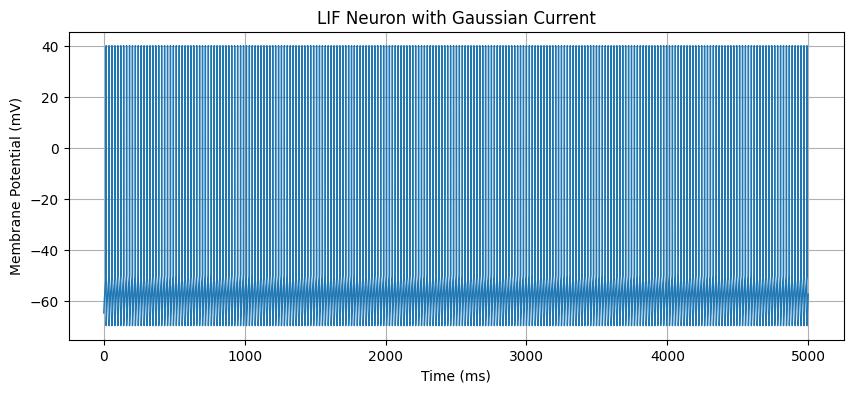

Mean ISI: 20.71875
Std of ISI: 0.16962734891520934


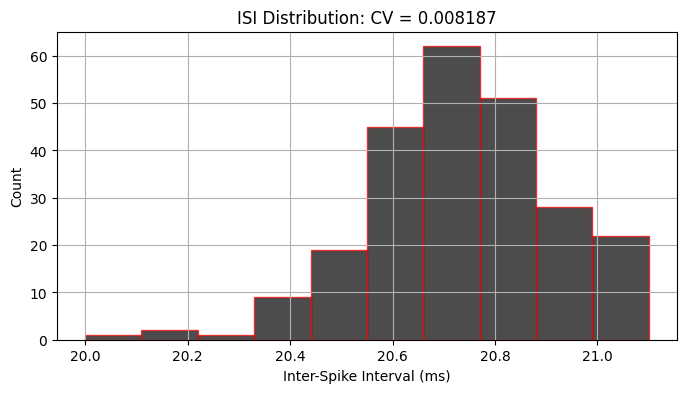

In [9]:
dt = 0.1
T = 5000.0
V0 = -65.0
I = 1.3
sigma = 0.1

# Use Gaussian-distributed current
times, potentials, spike_times = diffEQ_Solver(dt, V0, T, gaussian_distribution_current(I=I, sigma=sigma))
num_spikes = len(spike_times)

print("Number of spikes:", num_spikes)
plot_sim(times, potentials, title="LIF Neuron with Gaussian Current")


isis = np.diff(spike_times)  # differences between spike times

print("Mean ISI:", np.mean(isis) if len(isis) > 0 else "No spikes")
print("Std of ISI:", np.std(isis) if len(isis) > 0 else "No spikes")

CV = np.std(isis)/np.mean(isis)

plt.figure(figsize=(8,4))
plt.hist(isis, bins=10, color="black", edgecolor="red", alpha=0.7)
plt.xlabel("Inter-Spike Interval (ms)")
plt.ylabel("Count")
plt.title(f"ISI Distribution: CV = {CV:2f}")
plt.grid(True)
plt.show()


Number of spikes: 239


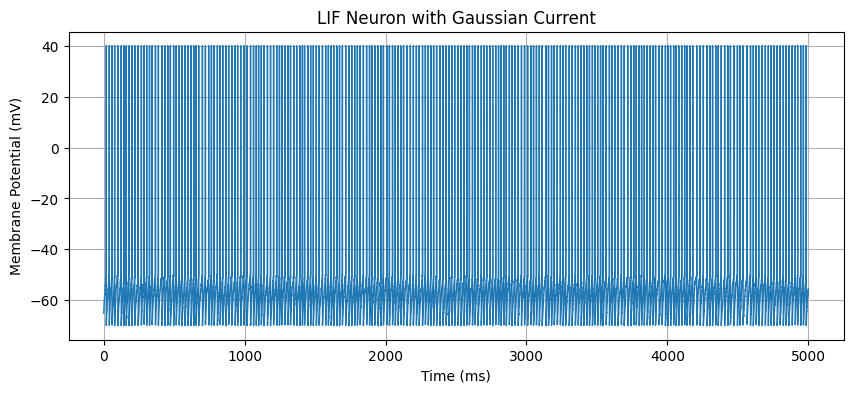

Mean ISI: 20.87058823529412
Std of ISI: 2.3050675974402903


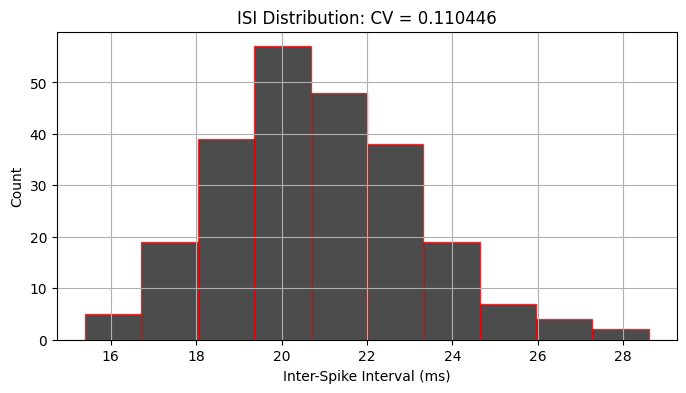

In [8]:
dt = 0.1
T = 5000.0
V0 = -65.0
I = 1.3
sigma = 1.3

# Use Gaussian-distributed current
times, potentials, spike_times = diffEQ_Solver(dt, V0, T, gaussian_distribution_current(I=I, sigma=sigma))
num_spikes = len(spike_times)

print("Number of spikes:", num_spikes)
plot_sim(times, potentials, title="LIF Neuron with Gaussian Current")


isis = np.diff(spike_times)  # differences between spike times

print("Mean ISI:", np.mean(isis) if len(isis) > 0 else "No spikes")
print("Std of ISI:", np.std(isis) if len(isis) > 0 else "No spikes")

CV = np.std(isis)/np.mean(isis)

plt.figure(figsize=(8,4))
plt.hist(isis, bins=10, color="black", edgecolor="red", alpha=0.7)
plt.xlabel("Inter-Spike Interval (ms)")
plt.ylabel("Count")
plt.title(f"ISI Distribution: CV = {CV:2f}")
plt.grid(True)
plt.show()


Number of spikes: 256


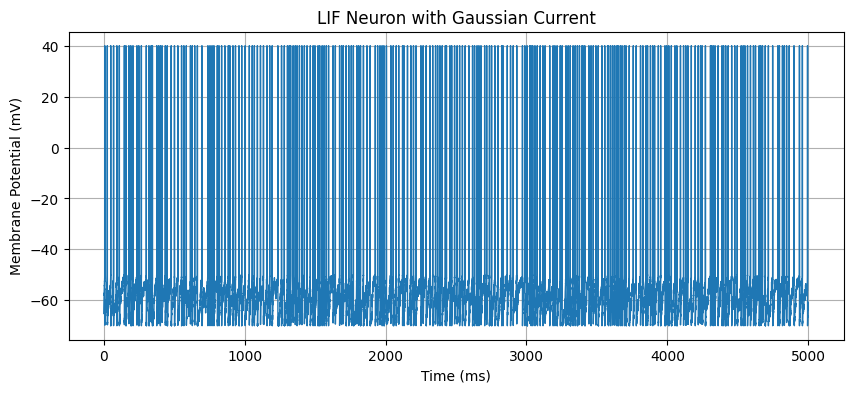

Mean ISI: 19.55686274509804
Std of ISI: 6.730878650854846


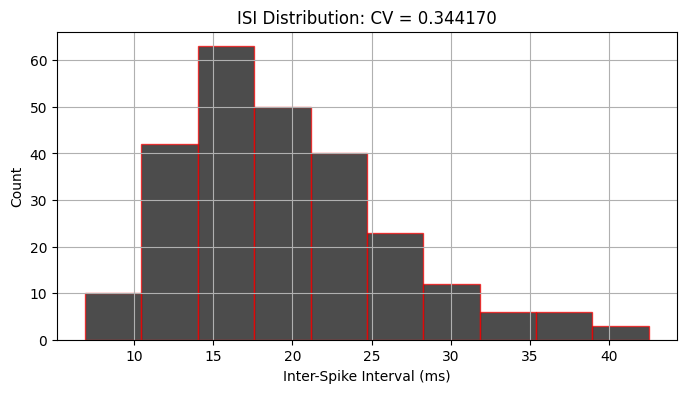

In [10]:
dt = 0.1
T = 5000.0
V0 = -65.0
I = 1.3
sigma = 5

# Use Gaussian-distributed current
times, potentials, spike_times = diffEQ_Solver(dt, V0, T, gaussian_distribution_current(I=I, sigma=sigma))
num_spikes = len(spike_times)

print("Number of spikes:", num_spikes)
plot_sim(times, potentials, title="LIF Neuron with Gaussian Current")


isis = np.diff(spike_times)  # differences between spike times

print("Mean ISI:", np.mean(isis) if len(isis) > 0 else "No spikes")
print("Std of ISI:", np.std(isis) if len(isis) > 0 else "No spikes")

CV = np.std(isis)/np.mean(isis)

plt.figure(figsize=(8,4))
plt.hist(isis, bins=10, color="black", edgecolor="red", alpha=0.7)
plt.xlabel("Inter-Spike Interval (ms)")
plt.ylabel("Count")
plt.title(f"ISI Distribution: CV = {CV:2f}")
plt.grid(True)
plt.show()


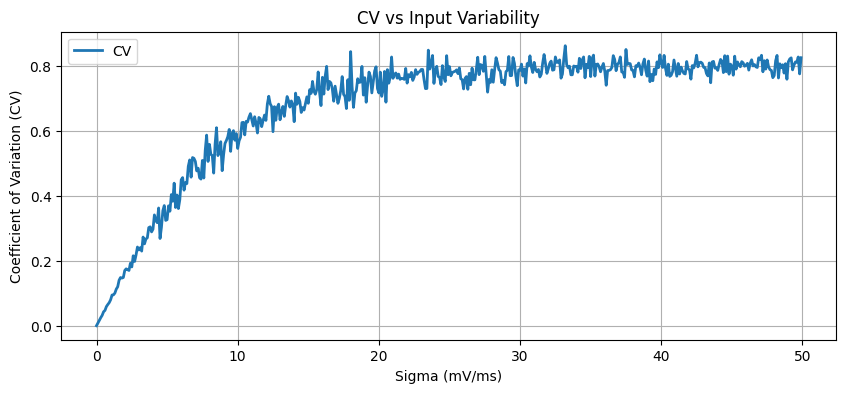

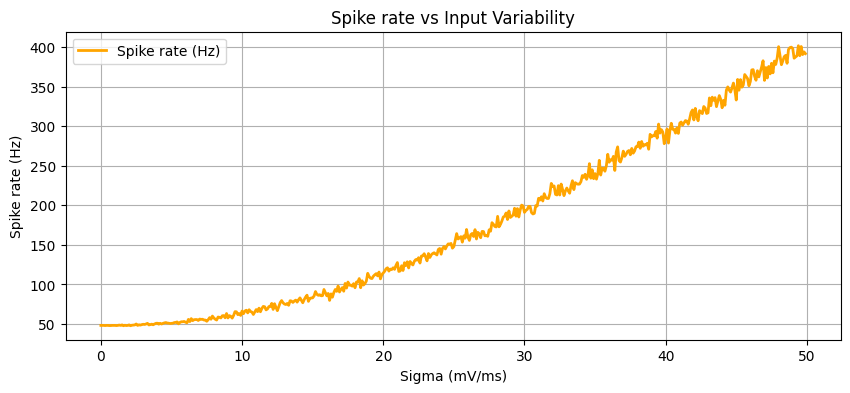

In [12]:
dt = 0.1
T = 5000.0
V0 = V_reset
I0 = 1.3

sigmas = np.arange(0, 50, 0.1)
CVs = []
spike_rates = []

for sigma in sigmas:
    times, potentials, spike_times = diffEQ_Solver(dt, V0, T, gaussian_distribution_current(I=I0, sigma=sigma))
    isis = np.diff(spike_times)

    # Compute CV only if enough spikes
    if len(isis) > 1:
        CV = np.std(isis) / np.mean(isis)
    else:
        CV = np.nan
    CVs.append(CV)

    spike_rate = len(spike_times) / (T / 1000.0)  # Hz
    spike_rates.append(spike_rate)

CVs = np.array(CVs)
spike_rates = np.array(spike_rates)

# Plot CV vs sigma
plt.figure(figsize=(10,4))
plt.plot(sigmas[~np.isnan(CVs)], CVs[~np.isnan(CVs)], lw=2, label="CV")
plt.xlabel("Sigma (mV/ms)")
plt.ylabel("Coefficient of Variation (CV)")
plt.title("CV vs Input Variability")
plt.grid(True)
plt.legend()
plt.show()

# Plot spike rate vs sigma
plt.figure(figsize=(10,4))
plt.plot(sigmas, spike_rates, lw=2, color='orange', label="Spike rate (Hz)")
plt.xlabel("Sigma (mV/ms)")
plt.ylabel("Spike rate (Hz)")
plt.title("Spike rate vs Input Variability")
plt.grid(True)
plt.legend()
plt.show()


The CV asymptotically approaches a value around 0.8. It never reaches the value of 1 when you run a current of ~1.3mV in this simulation. Any sigma of around 30mV or greater produces a pretty similar CV of around 0.8. To describe the CV as a function of input variability we first notice that 0 input variability causes the CV to be 0 as well. This is because the CV is equal to $\frac{\sigma}{\mu}$ of the interspike interval. For a constant current there is no variance of the interspike interval so the CV evaluates to 0.

Moving onto the behavior of the graph as we increase the input variability we see that the CV increases very quickly at the start and then levels off. I'll describe the leveling off behavior first since it is of note. As seen in the plot produced by the code cell below, where $\sigma = 50 > 1.3 = \mu$ the interspike interval becomes so small and is bounded by a non-negative constraint that the standard deviation can never reach the value of the mean. Instead it approaches the value of 0.8 in our simulation.

The behavior of the CV being increasing with the input variability makes intuitive sense. If we introduce varibility into the induced current we are thus introducing varibility into the interspike interval. When we do this the standard deviation of the interspike interval increases and thus since it is the numerator of the CV calculaiton, CV increases. Another thing to note is that the spike rate increases as well when the input variability increases (you can see this in the second plot above) and so the mean of the interspike interval decreases which is in the denominator and thus the CV will increase.

Number of spikes: 2035


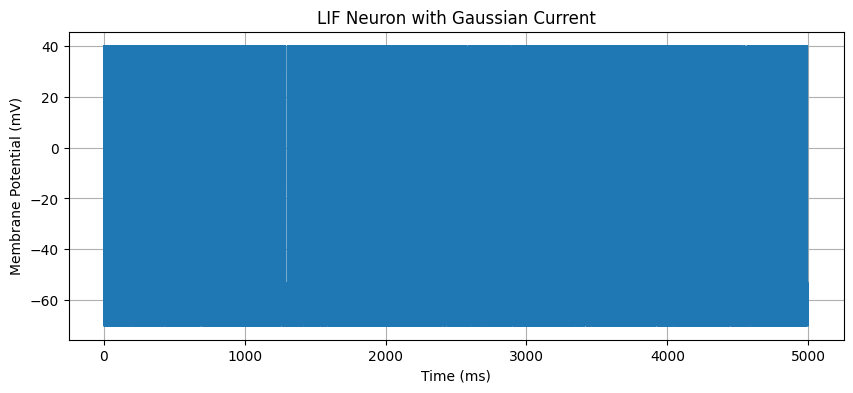

Mean ISI: 2.454768928220256
Std of ISI: 1.9445128330797772


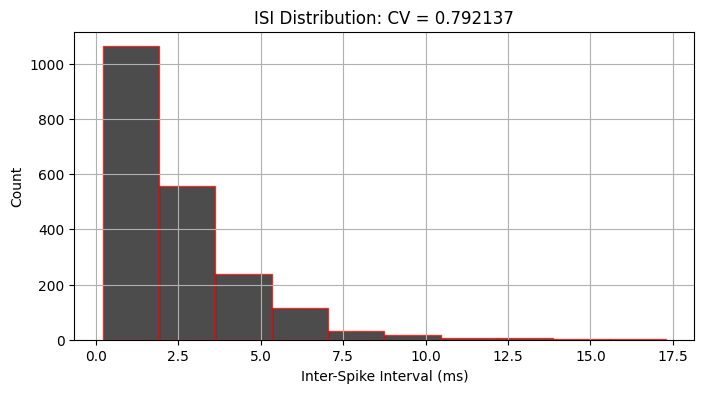

In [13]:
dt = 0.1
T = 5000.0
V0 = -65.0 # initial membrane potential
I = 1.3
sigma = 50

# Use Gaussian-distributed current
times, potentials, spike_times = diffEQ_Solver(dt, V0, T, gaussian_distribution_current(I=I, sigma=sigma))
num_spikes = len(spike_times)

print("Number of spikes:", num_spikes)
plot_sim(times, potentials, title="LIF Neuron with Gaussian Current")


isis = np.diff(spike_times)  # differences between spike times

print("Mean ISI:", np.mean(isis) if len(isis) > 0 else "No spikes")
print("Std of ISI:", np.std(isis) if len(isis) > 0 else "No spikes")

CV = np.std(isis)/np.mean(isis)

plt.figure(figsize=(8,4))
plt.hist(isis, bins=10, color="black", edgecolor="red", alpha=0.7)
plt.xlabel("Inter-Spike Interval (ms)")
plt.ylabel("Count")
plt.title(f"ISI Distribution: CV = {CV:2f}")
plt.grid(True)
plt.show()


The spike rate is an increasing function of the input variability in our simulation when you run a current of ~1.3mV through. When you start to add input varibility the spike rate slowly increases at first but when the variability dominates the value of the current induced per time step we see the spike rate increase even faster.

First thing to note is that since this model has a lower threshold on the membrane potential, if we sample a negative current from our Gaussian our membrane potential can never dip below a certain value. Since when we introduce variability in our sampling and as it increases it is likely to be large and thus reach this threshold we are essentially stopping the membrane potential from decreasing too largely, but not from increasing largely and hitting the threshold value. Basically when we sample from the Guassian a part of the left tail values are esentially capped and so the expected value of the Guassian changes from 0 to a positive value.

This causes our interspike interval to decrease since we induce a larger current on average. When the interspike interval decreases our spike rate thus increases. This analysis feels a bit cheesy since it is essentially breaking the model since I can't imagine the input variaility ever dominating the mean as much as I set it to ($\frac{\sigma}{\mu}=\frac{50}{1.3}$)